## 第7回課題: 恒星[S2](https://ja.wikipedia.org/wiki/S2_(恒星))の軌道といて座A\*（Sgr A*）の質量


*   データは[Gillessen et al. 2017, "An Update on Monitoring Stellar Orbits in the Galactic Center"](https://iopscience.iop.org/article/10.3847/1538-4357/aa5c41)の[Table 5](https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/ApJ/837/30/table5)から取得



In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
# 日本語も使えるようにしておく。
!pip install japanize_matplotlib
import japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


データはこれまで通りpandasで読み込む。

In [3]:
import pandas as pd

In [4]:
d = pd.read_csv("S2.csv")

In [5]:
d

,time,ra_offset,dec_offset
0,1992.224,-0.0099,0.1702
1,1994.314,-0.0337,0.1775
2,1995.534,-0.0418,0.1703
3,1996.253,-0.0476,0.1622
4,1996.427,-0.0503,0.1602
...,...,...,...
140,2016.287,-0.0660,0.0708
141,2016.325,-0.0660,0.0697
142,2016.369,-0.0662,0.0687
143,2016.525,-0.0644,0.0627


これは**恒星S2の位置がSgr A\*まわりの公転に伴ってどのように時間変化するかを示したデータ**である。timeは観測時刻を西暦（年）で書いたもの、ra_offsetは東西方向の角度（赤経）、dec_offsetは南北方向の角度（赤緯）を表す。赤経・赤緯については第7回講義スライドも参照。

ここでは原点をSgr A\*にとり、そこからのずれ（offset）の角度を秒角（1度の1/3600）単位で測定している。つまり、定義からSgr A\*のra_offset, dec_offsetはどちらも0である。

このままd["ra_offset"]のように使ってもよいのだが、毎回ra_offsetとか書くのは面倒なので配列を定義しておこう。

In [6]:
t, x, y = np.array(d["time"]), np.array(d["ra_offset"]), np.array(d["dec_offset"])

### 課題1: 軌道のプロット
x, yを二次元平面上に点でプロットして軌道の形を見てみよう。楕円形になっているのが見えるはずである（ケプラーの第一法則）。Sgr A\*の位置（ここでは0,0）もプロットし、データとSgr A\*それぞれに凡例をつけて表示してみよう（やり方は例えば[lecture5-1](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture5_doppler/lecture5-1_doppler.ipynb)の課題2を参照）。x,yの範囲（xlim, ylimで指定）を調整し、講義スライドの図と比較してみよう。
- プロットする点（マーカー）の形は丸以外も色々使える。https://matplotlib.org/stable/api/markers_api.html などを参考に、S2とSgr A\*を別のマーカーで表示してみよう。
- 講義スライドの図では観測年ごとに色分けされているがそこまではしなくてよい。
- plt.gca().set_aspect(1.)と書くと、縦軸と横軸の長さスケールが揃って近い図になるはずである。

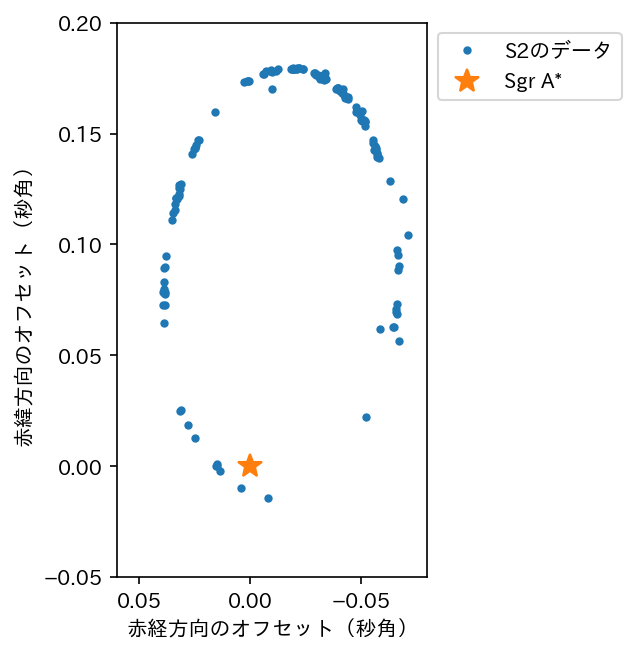

In [7]:
plt.figure()
plt.gca().set_aspect(1.)
plt.xlabel("赤経方向のオフセット（秒角）")
plt.ylabel("赤緯方向のオフセット（秒角）")
plt.xlim(0.06, -0.08) # 軸の左右を反転
plt.ylim(-0.05, 0.2)
plt.plot(x, y, ".", label="S2のデータ")
plt.plot(0, 0, "*", label='Sgr A*', markersize=12)
plt.legend(bbox_to_anchor=(1,1)); # 凡例の位置を調整

### 課題2: S2の公転周期の推定

課題1で作成したプロットではx,yのみを用いたので時間の情報は入っていない。そこでxまたはyを縦軸、**tを横軸**にとってグラフを作ると、x,yそれぞれについて恒星S2が周期的に運動しているのが見えるはずである（このデータは1周期分ちょっとに対応している）。プロットからS2の公転周期 period_yr を年単位で見積もろう。xやyのグラフを横軸（t方向）に適当にずらして、元のグラフと一部が重なるような値を探すとよい。

In [ ]:
period_yr = 16. # ここでは色々値を変えてプロットして探した

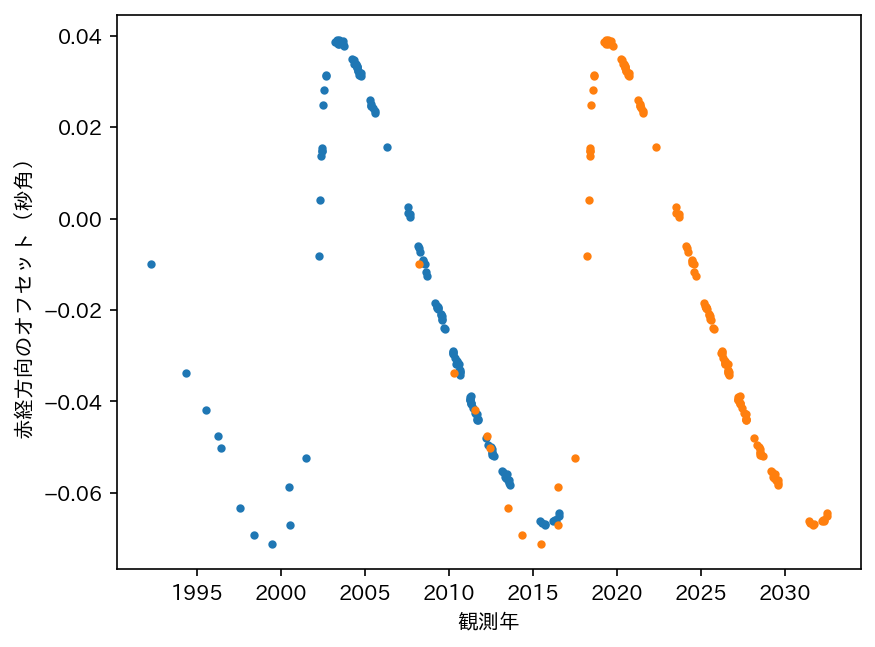

In [9]:
plt.xlabel("観測年")
plt.ylabel("赤経方向のオフセット（秒角）")
plt.plot(t, x, '.')
plt.plot(t + period_yr, x, '.');

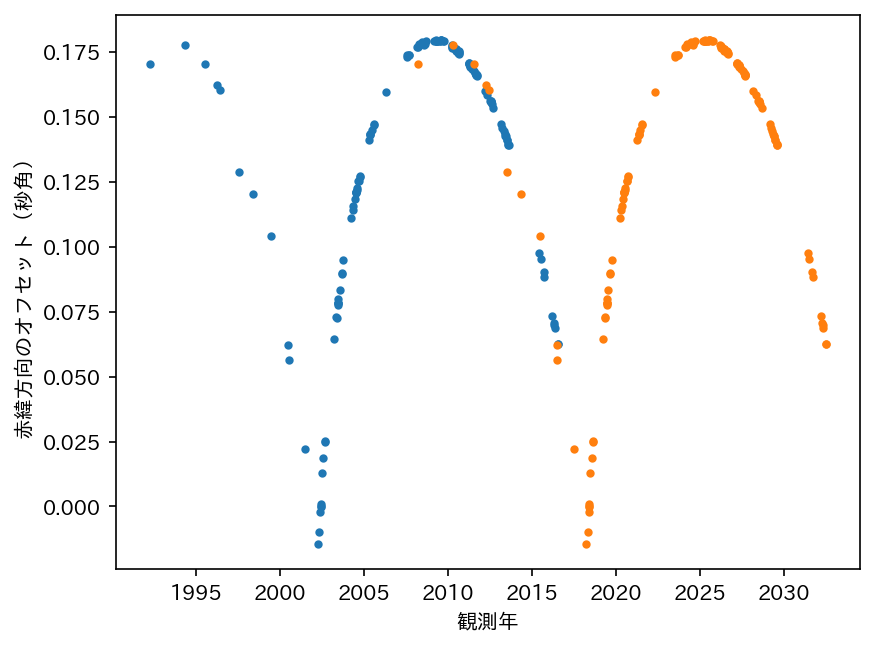

In [10]:
plt.xlabel("観測年")
plt.ylabel("赤緯方向のオフセット（秒角）")
plt.plot(t, y, '.')
plt.plot(t + period_yr, y, '.');

### 課題3: 角度で表した見かけの軌道長半径の導出

このデータから、軌道長半径（楕円軌道の長軸の半分の長さ）を秒角単位で表した量 sma_arcsec を求めよう。smaはsemi-major axis（軌道長半径）の略、arcsecは秒角を表す。縦軸・横軸の量は角度だが、ここでは普通の長さのように扱ってよい（球面で定義された角度であっても、角度が小さい範囲では平面として扱えるため）。求めたい軌道長半径は下のリンクの図に示してある。楕円の長軸（灰色の2つの点線のうち長い方）の半分の長さである。
https://www.dropbox.com/scl/fi/lqgodfox25quzv5npgdtx/schematic.png?rlkey=oe79tan8q2urw2308sazotcz4&dl=0

定量的に厳密な方法は、楕円軌道を表現する物理的なモデルとデータを比較することである。ここではそれはできないので、（必要な予備知識が少ないという意味で）もっと簡単な別の方法を考える。

上のリンクの図の観測データ（色のついた点）のうち、適当に選んだ2点を結んだ線分の長さを考えよう（例えば線分A）。このAの長さは明らかに楕円の長軸の長さより短い。うち一つの点を変えてBのようにするとより長くなるが、やはり楕円の長軸よりは短い。2点をCのようにとると、Cの長さはかなり楕円の長軸に近くなる。データがスカスカでなく楕円軌道の全体をほぼカバーしていれば、この操作を**データ中のあらゆる2点の組について行ったときに最も長い線分の長さ**がほぼ長軸の長さ（つまりその半分が軌道長半径）になるはずである。「最初から一番離れた2点を結べばいいのでは？」と思うかもしれないが、どの2点が一番離れているかは事前にはわからないので調べる必要がある。

そこでまず以下の図のようにデータ中の一点（$x_i, y_i$）を選び、

https://www.dropbox.com/scl/fi/4jc2oq23xvo8tt1krtcnk/schematic2.png?rlkey=iylm5mvl1ky0gpjiu25ny6z5n&dl=0tlwyy83drj&dl=0
- その点から他の全ての点（選んだ点を含んでもよい）までの長さを計算し、
- さらにその中で最大の長さを計算

してみよう。この長さは、**点（$x_i, y_i$）を含む線分の中では**最も長い。つまり一番離れた2点を結ぶ最長の線分の候補となる。

この計算を実行するため、i番目のデータ点(x[i], y[i])に対し、そこから最も遠いデータ点までの距離を求める[関数](https://utokyo-ipp.github.io/3/3-3.html) max_distance_from_i(x, y, i) を定義しよう。例えば、max_distance_from_i(x, y, **0**)は、全ての(x, y)のうち、(x[0], y[0])から一番遠い点までの距離である。2点間の距離は三平方の定理で計算すればよい。まず与えられた(x[i], y[i])から全ての(x, y)までの距離を含む配列dを求め、dの最大値を関数の返り値にするとよい。

**ヒント**: numpy.ndarrayの最大値はnp.max()で計算できる。例えば a = np.array([1,2,3,4,5]) について、np.max(a)は5になる。また numpy.ndarrayは各要素をまとめて2乗したり、ルートを取ったり(np.sqrtが使える）、要素ごとに足し算をしたりすることが可能である。さらに、例えば

In [11]:
a = np.array([1, 2, 3, 4, 5])

のような配列について、

In [12]:
a - 1

array([0, 1, 2, 3, 4])

のようにすると、aの全ての要素から1を引いた配列が得られる。つまりaとは違う長さの配列についても演算が可能な場合がある。

これを使えば、例えば配列x全体とxのi番目の差の配列（x-x[i]) を一度に計算できるので利用するとよい。

In [13]:
def max_distance_from_i(x, y, i):
    """i番目のデータ点とその他の点の距離の最大値を計算する関数"""
    dx_i = x - x[i] # i番目の点と全データ点のx座標の差の配列
    dy_i = y - y[i] # i番目の点と全データ点のy座標の差の配列
    distances_from_i = np.sqrt(dx_i**2 + dy_i**2) # i番目の点から全データ点までの距離の配列
    return np.max(distances_from_i)

あとは max_distance_from_i(x, y, i) を全てのデータ点（$i=0,1,2,\dots$）について計算すれば、その中で最大の値の半分が求める軌道長半径 sma_arcsec である。

ここでは[リスト内包表記](https://utokyo-ipp.github.io/6/6-1.html) を使って「max_distance_from_iを全てのデータ（$i$）について計算した配列」を作り、その最大値を求めてみよう。例えば、$i=0,1,2,...,9$に対して、$2i+1$からなる配列 odd_numbers は以下のように作れる。


In [14]:
odd_numbers = [2*i+1 for i in range(10)]

In [15]:
odd_numbers

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [16]:
max_distances = [max_distance_from_i(x, y, i) for i in range(len(x))] # 各データ点からの距離の最大値のリスト
sma_arcsec = np.max(max_distances) / 2. # 軌道長半径なので2で割る

得られた sma_arcsec を課題1で作成したプロットと見比べ、明らかにおかしな値になっていないことを確認しよう。

In [17]:
sma_arcsec

0.09720963172443356

### 課題4: 角度で表した軌道長半径を長さ（天文単位）に変換

次に、課題3で角度単位で求めた見かけの軌道長半径 sma_arcsec を、実際の軌道長半径（長さ）に変換したい。そのためには、いて座A\*までの距離を知る必要がある。銀河中心までの距離を大体$2.5\times10^{17}\,\mathrm{km}$, 1天文単位を$1.5\times 10^8\,\mathrm{km}$として、秒角単位のsma_arcsecを天文単位で表したsma_auに変換しよう。秒角は1度の1/3600である。

In [18]:
sma_radian = sma_arcsec / 3600. * (np.pi / 180.) # 秒角 -> radianに変換
sma_km = sma_radian * 2.5e17 # km単位の軌道長半径
sma_au = sma_km / 1.5e8 # km -> au単位に変換

In [19]:
sma_au

785.4759899270828

### 課題5: ケプラーの第三法則の適用

$a$を軌道長半径（天文単位）、$P$を公転周期（年）、$M$を中心天体の質量（太陽質量）とすると
$$
{a^3 \over P^2} = M
$$
である。上で導いた$a$（sma_au）、$P$（period_yr）を用いて$M$を太陽質量の単位で計算しよう。これがSgr A\*付近に存在するはずの質量である。

In [20]:
sma_au**3 / period_yr**2

1893035.5833991806

この値は実際の値の半分程度である。上の計算ではS2の軌道が我々の視線方向に垂直ではないことを考慮しておらず、軌道長半径が本当の値より小さく見積もられているためである。